In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Decision Trees

To understand Decision Trees, let's build one and take a look at how it makes prediction.

## Example 1: Good versus Evil

In [2]:
# load the good vs evil datasets
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_train'
train = pd.read_csv(url, index_col='name')
train

,sex,mask,cape,tie,ears,smokes,class
name,,,,,,,
batman,0,1,1,0,1,0,good
robin,0,1,1,0,0,0,good
alfred,0,0,0,1,0,0,good
penguin,0,0,0,1,0,1,bad
catwoman,1,1,0,0,1,0,bad
joker,0,0,0,0,0,0,bad


In [3]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_test'
test  = pd.read_csv(url, index_col='name')
test

,sex,mask,cape,tie,ears,smokes
name,,,,,,
batgirl,1,1,1,0,1,0
riddler,0,1,0,0,0,0


**goal:** identify people as good or bad from their appearance

In [4]:
# feature matrix / target vector
X_train = train[['sex','mask','cape','tie','ears','smokes']]
y_train = train['class']
X_test = test

The following code trains a **Decision Tree** on the *good or evil* dataset

In [5]:
# train a decision tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

You can visualize the trained Decision Tree by using the **plot_tree** method.

[Text(502.20000000000005, 475.65000000000003, 'cape <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = bad'),
 Text(334.8, 339.75, 'tie <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = bad'),
 Text(167.4, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = bad'),
 Text(502.20000000000005, 203.85000000000002, 'smokes <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = bad'),
 Text(334.8, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(669.6, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = bad'),
 Text(669.6, 339.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = good')]

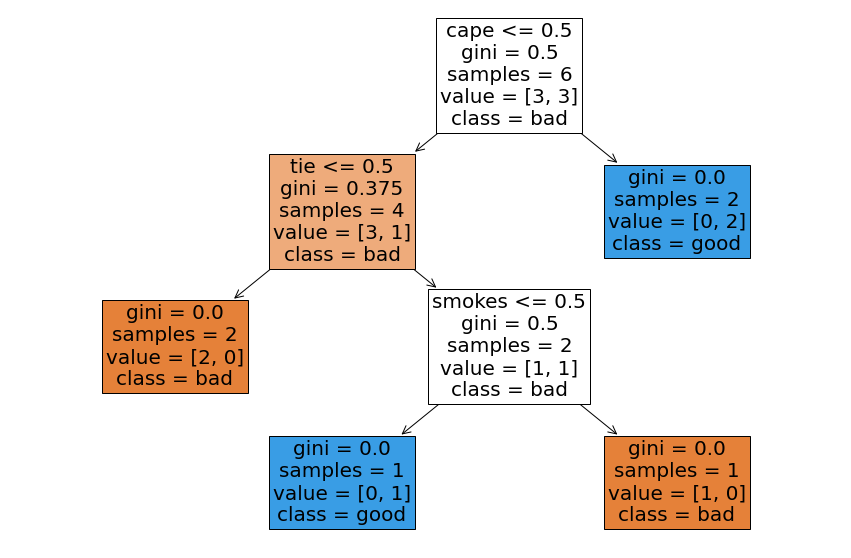

In [6]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(tree_clf, feature_names=X_train.columns, class_names =tree_clf.classes_, filled='True', fontsize=20)

A **node's samples** attribute counts how many training instances it applies to.
A **node's value** attribute tells you how many training instances of each class this done applies to.
A **node's gini** attribute measures its *impurity*: a node is "pure" (gini=0) if all training instances it applies to belong to the same class.

Let's see how the tree **makes predictions**

- You start at the top node, called the **root note**, (depth 0). 
This node asks you the question: *does the character wear a cape*.
- If the answer is "yes" (1), you move down to the root's right **child node**.
This node is a **leaf node** (it does not have any child nodes). 
So it does not ask any questions.
The tree predicts that the character is good.
- If the answer is "no" (0), you move down to the root's left child node (depth 1), which is not a leaf node. 
This node asks you another question: *does the character wears a tie?* 
- etc

In [7]:
X_test

,sex,mask,cape,tie,ears,smokes
name,,,,,,
batgirl,1,1,1,0,1,0
riddler,0,1,0,0,0,0


In [8]:
# making classification
tree_clf.predict(X_test)

array(['good', 'bad'], dtype=object)

Scikit-learn uses the *Classification and Regression Tree (CART)* algorithm.
At each step, CART searches the "question" that produces the **purest subsets** (weighted by their size). 

## Example 2: the pima indians diabetes dataset

If left unconstrained, Decision Trees will **overfit** the data (it will adapt itself to the training data, fitting it very closely). 

In [9]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = diabetes.iloc[:,0:8]
y = diabetes.label.replace({1 : 'diabetes', 0 : 'not_diabetes'})

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [12]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

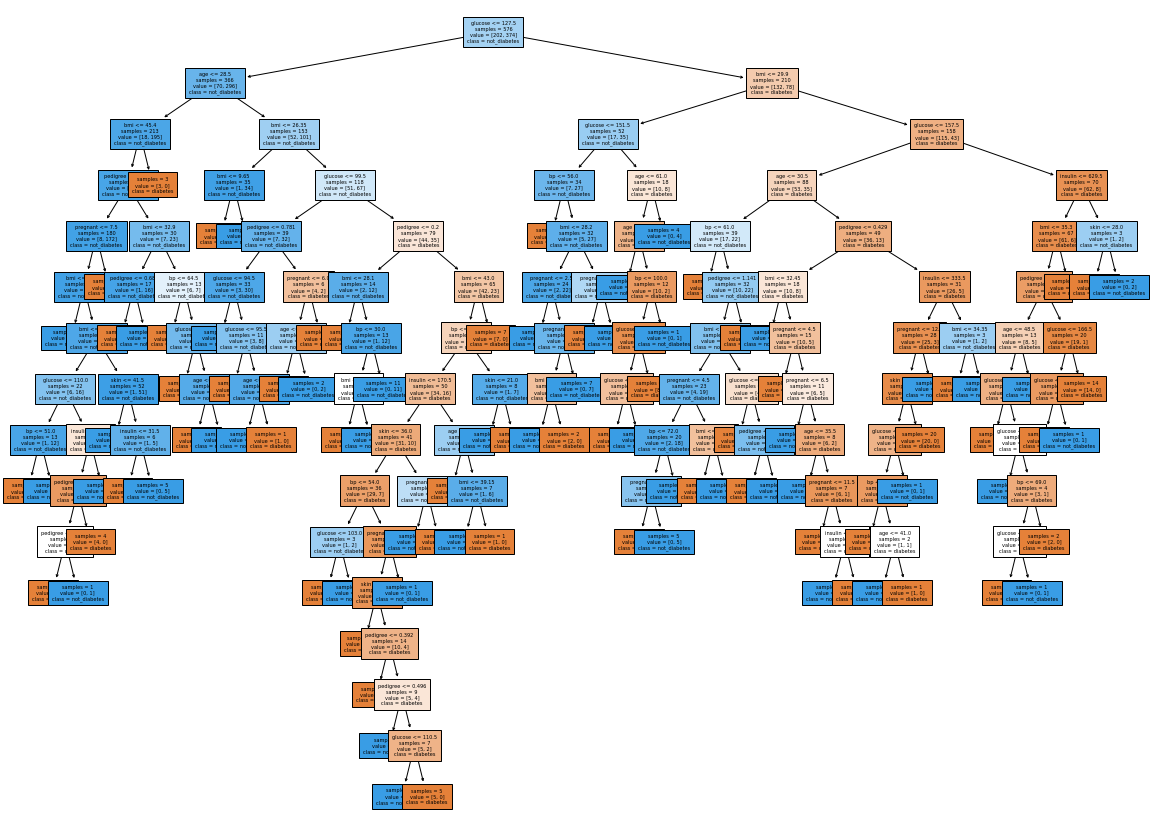

In [13]:
# an overly complicated model
fig = plt.figure(figsize=(20,15))
_ = plot_tree(tree_clf, feature_names=X_train.columns, class_names =tree_clf.classes_, filled='True', impurity=False, fontsize=5)

An overfitted model:
- performs well on the training data
- performs poorly on the test data

In [14]:
from sklearn.metrics import accuracy_score
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

In [15]:
accuracy_score(y_train,y_train_pred)

1.0

In [16]:
accuracy_score(y_test, y_test_pred)

0.6302083333333334

To avoid overfitting, we need to restrict the Decision Tree's freedom during training.
This is controlled by the **max_depth** hyperparameter (by default, unlimited).
Reducing max_depth will  reduce the risk of overfitting.

In [17]:
depths = list(range(1,20))
accuracy_train = []
accuracy_test = []
for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

In [18]:
# change matplotlib style (only if you know and like XKCD comics)
plt.xkcd()

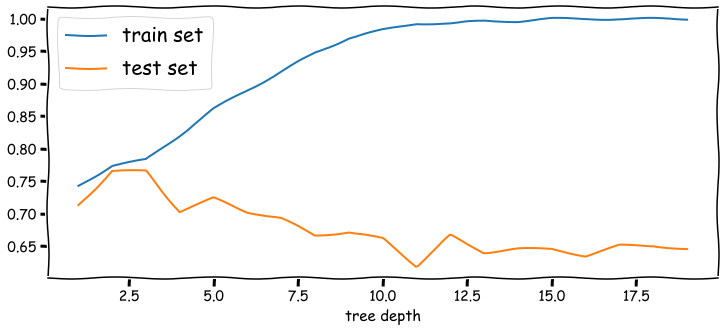

In [19]:
plt.figure(figsize=(12,5))
plt.plot(depths,accuracy_train, label='train set')
plt.plot(depths,accuracy_test, label='test set')
plt.xlabel('tree depth',fontsize=15)
plt.legend(fontsize=20)

Decision Trees have other hyperparameters that restric the complexity of the tree:
- min_samples_split (The minimum number of samples required to split an internal node)
- min_sample_leaf (The minimum number of samples required to be at a leaf node.)
- max_leaf_nodes (the maximum number of leaf nodes)
- max_features (the maximum number of features that are evaluated for splitting at each node)